# Lecture 7 - Two-qubit iSWAP gate and process tomography

Author: J. R. Johansson (robert@riken.jp), https://jrjohansson.github.io/

This lecture series was developed by J.R. Johansson. The original lecture notebooks are available [here](https://github.com/jrjohansson/qutip-lectures).

This is a slightly modified version of the lectures, to work with the current release of QuTiP. You can find these lectures as a part of the [qutip-tutorials repository](https://github.com/qutip/qutip-tutorials). This lecture and other tutorial notebooks are indexed at the [QuTiP Tutorial webpage](https://qutip.org/tutorials.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, propagator, qeye, qpt, qpt_plot_combined,
                   sigmam, sigmax, sigmay, sigmaz, spost, spre, tensor)

%matplotlib inline

### Introduction

Let's consider a simple protocol for implementing the two-qubit iSWAP gate: During a time $T=\pi/4g$, the qubits are subject to the coupling Hamiltonian 

$\displaystyle H = g \left(\sigma_x\otimes\sigma_x + \sigma_y\otimes\sigma_y\right)$

where $g$ is the coupling strength. Under ideal conditions this coupling realizes the $i$-SWAP gate between the two qubit states. 

Here we will solve for the dynamics of the two qubits subject to this Hamiltonian, and look at the deteriorating effects of adding decoherence. We will use process tomography to visualize the gate.

### Parameters

In [2]:
g = 1.0 * 2 * np.pi  # coupling strength
g1 = 0.75  # relaxation rate
g2 = 0.25  # dephasing rate
n_th = 1.5  # bath temperature

T = np.pi / (4 * g)

### Hamiltonian and initial state

In [3]:
H = g * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
psi0 = tensor(basis(2, 1), basis(2, 0))

### Collapse operators

Define a list of collapse operators that describe the coupling of the qubits to their environment (assumed to be uncorrelated)

In [4]:
c_ops = []

# qubit 1 collapse operators
sm1 = tensor(sigmam(), qeye(2))
sz1 = tensor(sigmaz(), qeye(2))
c_ops.append(np.sqrt(g1 * (1 + n_th)) * sm1)
c_ops.append(np.sqrt(g1 * n_th) * sm1.dag())
c_ops.append(np.sqrt(g2) * sz1)

# qubit 2 collapse operators
sm2 = tensor(qeye(2), sigmam())
sz2 = tensor(qeye(2), sigmaz())
c_ops.append(np.sqrt(g1 * (1 + n_th)) * sm2)
c_ops.append(np.sqrt(g1 * n_th) * sm2.dag())
c_ops.append(np.sqrt(g2) * sz2)

### Process tomography basis

In [5]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

### Ideal evolution (nondissipative, perfect timing, etc)

In [6]:
# calculate the propagator for the ideal gate
U_psi = (-1j * H * T).expm()

In [7]:
# propagator in superoperator form
U_ideal = spre(U_psi) * spost(U_psi.dag())

In [8]:
# calculate the process tomography chi matrix from the superoperator propagator
chi = qpt(U_ideal, op_basis)

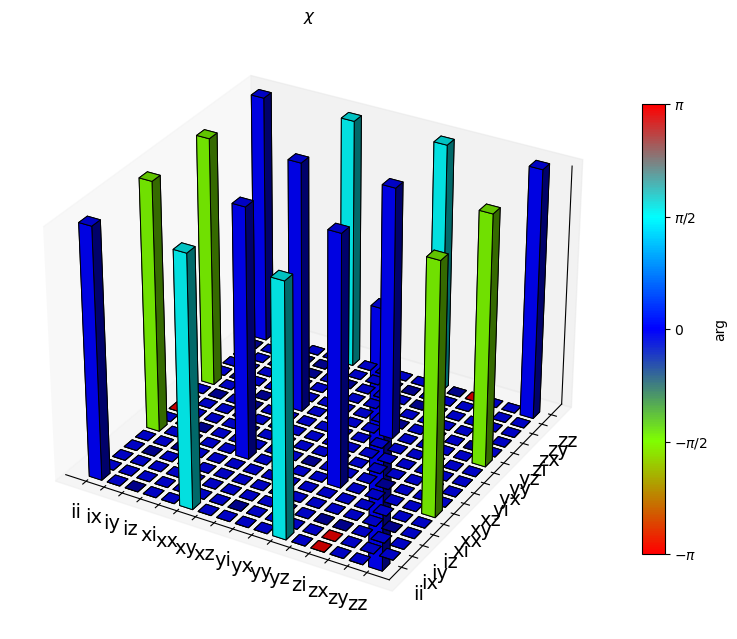

In [9]:
fig = plt.figure(figsize=(8, 6))
fig = qpt_plot_combined(chi, op_label, fig=fig)

### Dissipative evolution

In [10]:
# dissipative gate propagator
U_diss = propagator(H, T, c_ops)

In [11]:
# calculate the process tomography chi matrix for the dissipative propagator
chi = qpt(U_diss, op_basis)

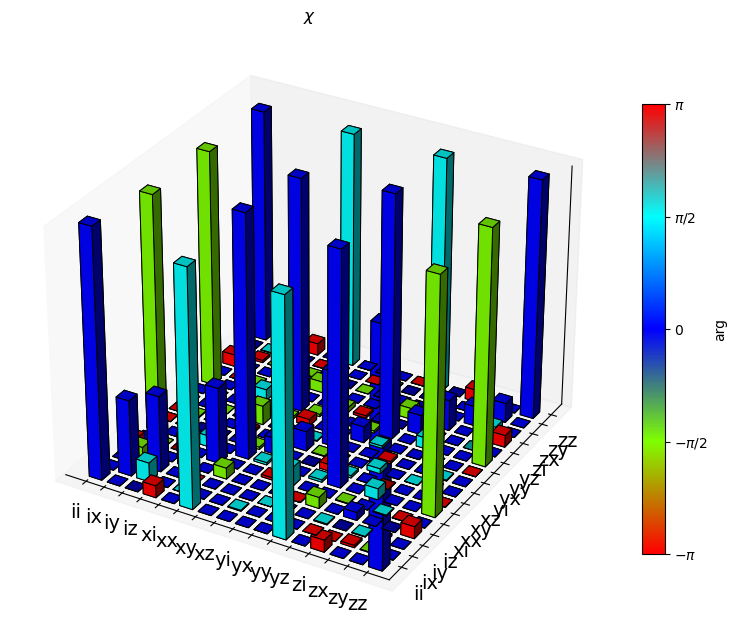

In [12]:
fig = plt.figure(figsize=(8, 6))
fig = qpt_plot_combined(chi, op_label, fig=fig)

### Software versions:

In [13]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
